# Processus de régression linéaire

## Forme de la fonction de prédiction

$$
\text{Hypothèse} : h_{\theta}(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n
$$

## Fonction de coût

$$
\text{Fonction de coût} : J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2
$$

## Exemple sur des données synthétiques

In [10]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [13]:
# Generate random data
np.random.seed(0)  # for reproducibility
x = np.random.rand(100, 1)
y = 2 * x + 1 + np.random.randn(100, 1) * 0.3  # y = 2x + 1 + noise

X, y = pd.Series(x.flatten()), pd.Series(y.flatten())

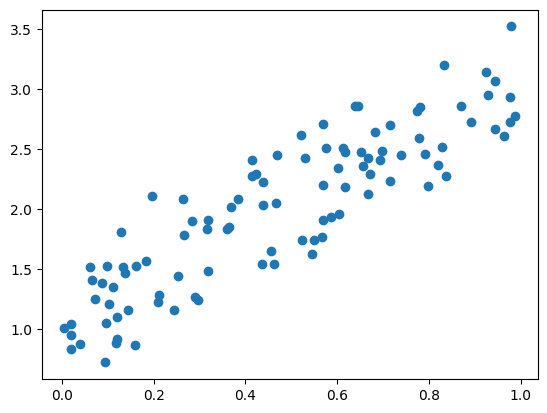

In [14]:
plt.scatter(X, y)

In [15]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

On a donc une correspondance entre les valeurs de $x$ et les valeurs de $y$ suivante :
$$
y = 2x + 1+ \text{bruit}
$$

On va donc essayer de retrouver les valeurs de $\theta_0$ et $\theta_1$ qui permettent de retrouver cette relation. c'est à dire retrouver, avec l'algorithme les coefficients $\theta_1 = 2$ et $\theta_0 = 1$, étant donné que l'on connait les $x$ et $y$, seuls les $\theta_i$ sont inconnus.

> Le _compute_ des coefficients $\theta_i$ est réalisé avec `LinearRegression`, comme le relation entre les données semble linéaire (vu sur le graphique).

In [16]:
# Train a linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Make predictions

y_pred = model.predict(X_test)

On a donc obtenu ici `y_pred` $= \hat y$. On peut alors calculer les coûts pour chaque ligne ($(h_{\theta}(x^{(i)}) - y^{(i)})^2$) :

In [ ]:
pd.Series((y_pred - y_test)**2) ## Pour chacune des lignes, on calcule l'erreur au carré

26    0.020525
86    0.103708
2     0.013722
55    0.033716
75    0.047288
93    0.047830
16    0.000229
73    0.073173
54    0.044275
95    0.034227
53    0.000087
92    0.056622
78    0.132892
13    0.071857
7     0.006187
30    0.291812
22    0.162138
24    0.137591
33    0.303286
8     0.120018
43    0.143904
62    0.000732
3     0.233294
71    0.242489
45    0.004617
48    0.032849
6     0.110417
99    0.000167
82    0.070878
76    0.100988
dtype: float64

En sommant ces erreurs, on obtient la somme des carrés des erreurs (SSE) : 

In [20]:
pd.Series((y_pred - y_test)**2).sum()

np.float64(2.6415167853949555)

Que l'on rapporte au nombre d'éléments dans le dataset de test pour obtenir la moyenne des erreurs (MSE) :

In [23]:
pd.Series((y_pred - y_test)**2).sum() / (len(y_test))

np.float64(0.08805055951316518)

> En pratique, on utilise tout simplement `mean_squared_error` de `sklearn.metrics` pour obtenir cette valeur.

In [24]:
# Evaluate the model

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse:0.6f}')

Mean Squared Error: 0.088051


## Algorithme de descente de gradient

> Cet algorithme es le petit secret derrière la régression linéaire. Il permet de trouver les coefficients $\theta_i$ qui minimisent la fonction de coût $J(\theta)$.

$$
\text{Répéter jusqu'à convergence} \{ \\
\quad \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta) \\
\}
$$